[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1bOZXUz-9gcc-yZLNWI8PekhUPCIXx2jU?usp=sharing)

Jonathan Fernandes - https://www.linkedin.com/in/jonathanafernandes/

Colab setting: Runtime | GPU

In [ ]:
!pip install -Uq diffusers ftfy accelerate gradio transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.4/716.4 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 974.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 1.4 MB/s eta 0:

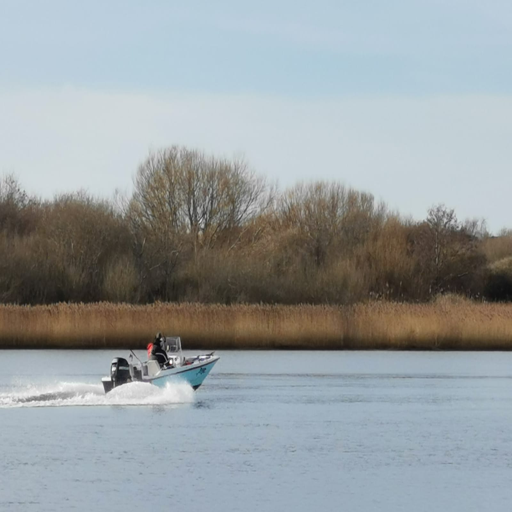

In [ ]:
import torch
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt
import os
from transformers import CLIPTokenizer, CLIPTextModel
from diffusers import (
    StableDiffusionPipeline, 
    StableDiffusionImg2ImgPipeline,
    StableDiffusionInpaintPipeline, 
    StableDiffusionDepth2ImgPipeline
    ) 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

url = "https://github.com/jonfernandes/images/raw/main/boat.jpeg"

def download_image(url):
  return Image.open(requests.get(url, stream=True).raw).convert("RGB")



init_image = download_image(url).resize((512, 512))
init_image

In [ ]:
init_image.save("boat-500x500.jpg")

In [ ]:
from google.colab import files
files.download("boat-500x500.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## Stable Diffusion (10 min)

- https://beta.dreamstudio.ai/
- overview: download, options, seed, image
- https://www.reddit.com/r/StableDiffusion/comments/wyduk1/show_rstablediffusion_integrating_sd_in_photoshop/

**Exercise:** 
- Create a prompt that will allow you to create a similar image.
- What prompt works best?
- What negative prompt works best? (This is only available in this notebook or huggingface spaces and not in dreamstudio)
- Try Classifier-free guidance (CFG) scales of 1, 6, 12, 20 - what difference do you notice?



Try Stable Diffusion here (in this order):
- https://beta.dreamstudio.ai/
- https://huggingface.co/spaces/stabilityai/stable-diffusion

In [ ]:
model_id = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionPipeline.from_pretrained(model_id).to(device)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

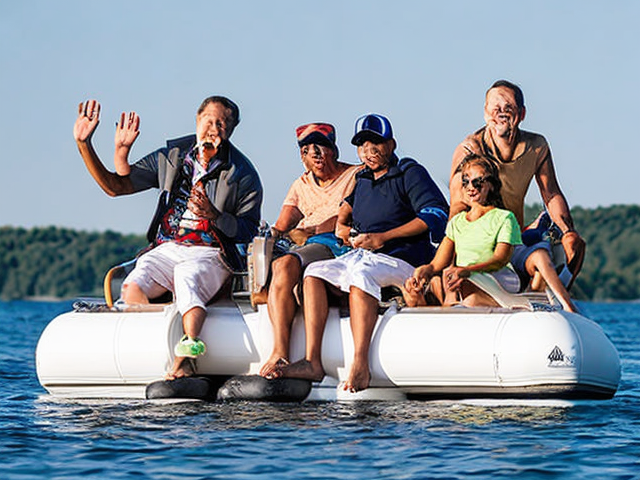

In [ ]:
generator = torch.Generator(device=device).manual_seed(1)

pipe_output = pipe(
    prompt="people on a boat", 
    negative_prompt="Oversaturated, blurry, low quality, painting", 
    height=480, width=640,     
    guidance_scale=8,          
    num_inference_steps=50
)

pipe_output.images[0]

## NSFW filter (3 min)

- How would you ensure there is no nudity/violence/gore in the images that are generated?


## Bias and limitations (7 min)

- Demonstrate bias and post both your code and the image on Google docs
- What are some of the limitations of the model

## Controversy (5 min)

Copying artist styles
- https://www.technologyreview.com/2022/09/16/1059598/this-artist-is-dominating-ai-generated-art-and-hes-not-happy-about-it/
- 2 approaches
  - Getty Images
  - Shutterstock

## Prompt book (5 min)

- Use the prompt book - https://openart.ai/promptbook. What have you learned?
- What updated prompt gives the best results

## CLIP Interrogator (5 min)

Credit: @pharmapsychotic

If this doesn't work or is too busy, then run the code below in the notebook https://huggingface.co/spaces/pharma/CLIP-Interrogator

In [ ]:
import os, subprocess

def setup():
    install_cmds = [
        ['pip', 'install', 'gradio'],
        ['pip', 'install', 'open_clip_torch'],
        ['pip', 'install', 'clip-interrogator'],
    ]
    for cmd in install_cmds:
        print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))

setup()


clip_model_name = 'ViT-L-14/openai' #@param ["ViT-L-14/openai", "ViT-H-14/laion2b_s32b_b79k"]

import gradio as gr
from clip_interrogator import Config, Interrogator

config = Config()
config.blip_num_beams = 64
config.blip_offload = False
config.clip_model_name = clip_model_name
ci = Interrogator(config)

def image_analysis(image):
    image = image.convert('RGB')
    image_features = ci.image_to_features(image)

    top_mediums = ci.mediums.rank(image_features, 5)
    top_artists = ci.artists.rank(image_features, 5)
    top_movements = ci.movements.rank(image_features, 5)
    top_trendings = ci.trendings.rank(image_features, 5)
    top_flavors = ci.flavors.rank(image_features, 5)

    medium_ranks = {medium: sim for medium, sim in zip(top_mediums, ci.similarities(image_features, top_mediums))}
    artist_ranks = {artist: sim for artist, sim in zip(top_artists, ci.similarities(image_features, top_artists))}
    movement_ranks = {movement: sim for movement, sim in zip(top_movements, ci.similarities(image_features, top_movements))}
    trending_ranks = {trending: sim for trending, sim in zip(top_trendings, ci.similarities(image_features, top_trendings))}
    flavor_ranks = {flavor: sim for flavor, sim in zip(top_flavors, ci.similarities(image_features, top_flavors))}
    
    return medium_ranks, artist_ranks, movement_ranks, trending_ranks, flavor_ranks

def image_to_prompt(image, mode):
    ci.config.chunk_size = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    ci.config.flavor_intermediate_count = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    image = image.convert('RGB')
    if mode == 'best':
        return ci.interrogate(image)
    elif mode == 'classic':
        return ci.interrogate_classic(image)
    elif mode == 'fast':
        return ci.interrogate_fast(image)
    elif mode == 'negative':
        return ci.interrogate_negative(image)

def prompt_tab():
    with gr.Column():
        with gr.Row():
            image = gr.Image(type='pil', label="Image")
            with gr.Column():
                mode = gr.Radio(['best', 'fast', 'classic', 'negative'], label='Mode', value='best')
        prompt = gr.Textbox(label="Prompt")
    button = gr.Button("Generate prompt")
    button.click(image_to_prompt, inputs=[image, mode], outputs=prompt)

def analyze_tab():
    with gr.Column():
        with gr.Row():
            image = gr.Image(type='pil', label="Image")
        with gr.Row():
            medium = gr.Label(label="Medium", num_top_classes=5)
            artist = gr.Label(label="Artist", num_top_classes=5)        
            movement = gr.Label(label="Movement", num_top_classes=5)
            trending = gr.Label(label="Trending", num_top_classes=5)
            flavor = gr.Label(label="Flavor", num_top_classes=5)
    button = gr.Button("Analyze")
    button.click(image_analysis, inputs=image, outputs=[medium, artist, movement, trending, flavor])

with gr.Blocks() as ui:
    with gr.Tab("Prompt"):
        prompt_tab()
    with gr.Tab("Analyze"):
        analyze_tab()

ui.launch(show_api=False, debug=False)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Loading BLIP model...
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_large_caption.pth
Loading CLIP model...
Loaded CLIP model and data in 13.77 seconds.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

## Img2Img (7 min)

In [ ]:
model_id = "stabilityai/stable-diffusion-2-1-base"
img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id).to(device)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
result_image = img2img_pipe(
    prompt="a couple of people on a speed boat with the boat in the centre of the image",
    image = init_image, # The starting image
    strength = 0.6, # 0 for no change, 1.0 for max strength
).images[0]

# View the result
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(init_image);axs[0].set_title('Input Image')
axs[1].imshow(result_image);axs[1].set_title('Result');

NameError: ignored

## playgroundai.com (10 min)

- https://playgroundai.com/
- https://www.youtube.com/watch?v=JFt_YFWJu8o&ab_channel=PlaygroundAI

## InstructPix2Pix (7 min)

Exercise: What do you have to do to replace the speed boat in the image with say a dolphin (or anything else you might find in the sea)? What prompt gives you the best image?

- Option 1: https://replicate.com/timothybrooks/instruct-pix2pix
- Option 2: Run this in the notebook using the cell below

Exercise: 
- Change the boat to another type of boat say a luxury yacht.
- Change the time of day the photo was taken to something else

In [ ]:
# Fill in the prompt below
prompt = ""

In [ ]:
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None).to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
# `image` is an RGB PIL.Image
images = pipe(prompt, image=init_image).images
images[0]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

## Textual inversion (10 min)


In [ ]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

model_id = "CompVis/stable-diffusion-v1-4"

In [ ]:
from IPython.display import Markdown
from huggingface_hub import hf_hub_download

repo_id_embeds = "sd-concepts-library/herge-style"


In [ ]:
embeds_url = "" 
placeholder_token_string = "" 

downloaded_embedding_folder = "./downloaded_embedding"
if not os.path.exists(downloaded_embedding_folder):
  os.mkdir(downloaded_embedding_folder)
if not embeds_url:
  embeds_path = hf_hub_download(repo_id=repo_id_embeds, filename="learned_embeds.bin")
  token_path = hf_hub_download(repo_id=repo_id_embeds, filename="token_identifier.txt")
  !cp $embeds_path $downloaded_embedding_folder
  !cp $token_path $downloaded_embedding_folder
  with open(f'{downloaded_embedding_folder}/token_identifier.txt', 'r') as file:
    placeholder_token_string = file.read()
else:
  !wget -q -O $downloaded_embedding_folder/learned_embeds.bin $embeds_url

learned_embeds_path = f"{downloaded_embedding_folder}/learned_embeds.bin"

print(f"The placeholder token for the concept is {placeholder_token_string}")

The placeholder token for the concept is <herge>


In [ ]:
tokenizer = CLIPTokenizer.from_pretrained(
    model_id,
    subfolder="tokenizer",
)
text_encoder = CLIPTextModel.from_pretrained(
    model_id, subfolder="text_encoder", torch_dtype=torch.float16
)

In [ ]:
tokenizer = CLIPTokenizer.from_pretrained(
    model_id,
    subfolder="tokenizer",
)
text_encoder = CLIPTextModel.from_pretrained(
    model_id, subfolder="text_encoder", torch_dtype=torch.float16
)

def load_learned_embed_in_clip(learned_embeds_path, text_encoder, tokenizer, token=None):
  loaded_learned_embeds = torch.load(learned_embeds_path, map_location="cpu")
  
  trained_token = list(loaded_learned_embeds.keys())[0]
  embeds = loaded_learned_embeds[trained_token]

  dtype = text_encoder.get_input_embeddings().weight.dtype
  embeds.to(dtype)

  token = token if token is not None else trained_token
  num_added_tokens = tokenizer.add_tokens(token)
  if num_added_tokens == 0:
    raise ValueError(f"The tokenizer already contains the token {token}. Please pass a different `token` that is not already in the tokenizer.")
  
  text_encoder.resize_token_embeddings(len(tokenizer))
  
  token_id = tokenizer.convert_tokens_to_ids(token)
  text_encoder.get_input_embeddings().weight.data[token_id] = embeds

load_learned_embed_in_clip(learned_embeds_path, text_encoder, tokenizer)

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    text_encoder=text_encoder,
    tokenizer=tokenizer,
).to(device)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

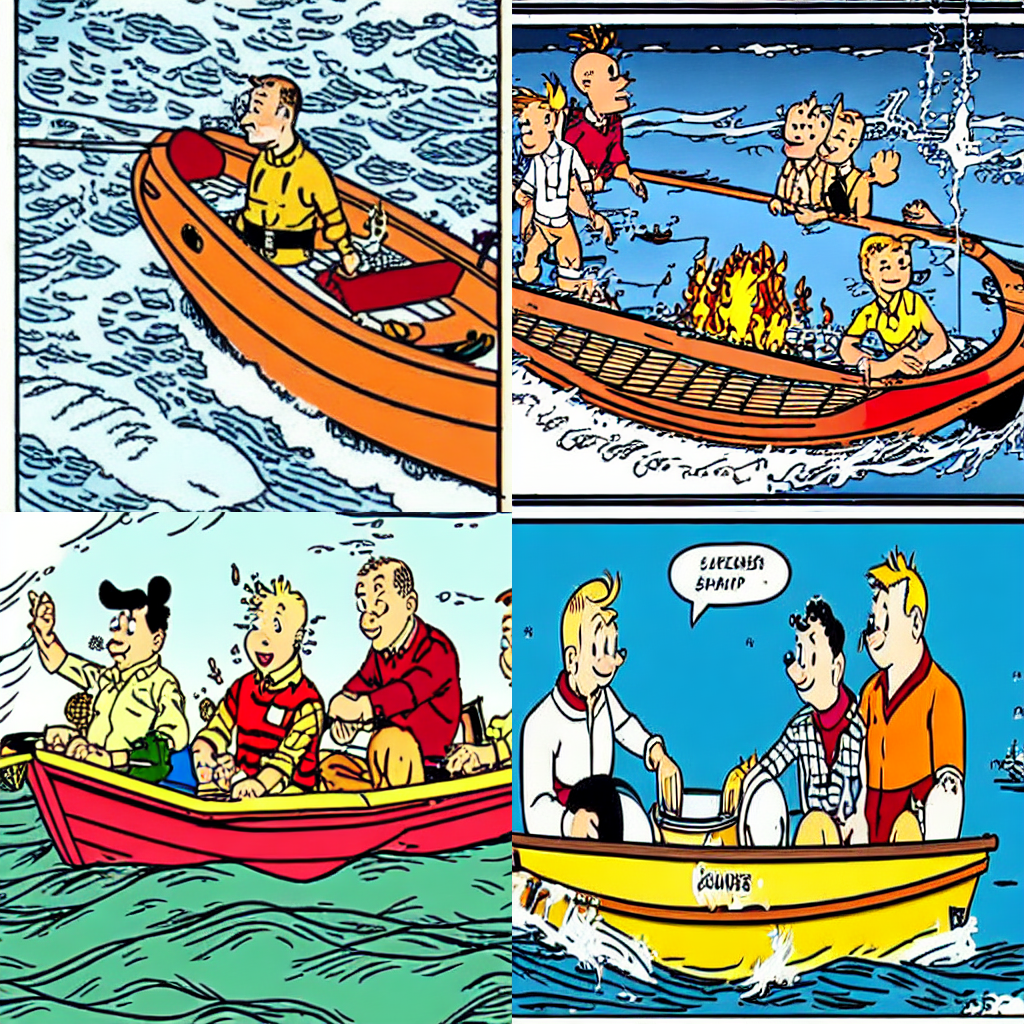

In [ ]:
prompt = "A boat on the sea in the style of <herge>" 
num_samples = 2 
num_rows = 2 

all_images = [] 
for _ in range(num_rows):
    images = pipe(prompt, num_images_per_prompt=num_samples, num_inference_steps=50, guidance_scale=7.5).images
    all_images.extend(images)

grid = image_grid(all_images, num_samples, num_rows)
grid

https://huggingface.co/sd-concepts-library
- Select another "concept" or "style" and try it with the same prompt

## GFPGAN (5 min)

- Real-world face restoration
- https://replicate.com/tencentarc/gfpgan

## ControlNet (7 min)

- https://stablediffusionweb.com/ControlNet#demo

- https://huggingface.co/spaces/hysts/ControlNet

- https://huggingface.co/spaces/RamAnanth1/ControlNet

- https://www.reddit.com/r/StableDiffusion/comments/11ef0zx/realistic_lofi_girl_v3/